# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [6]:
# Take make moons in built dataset

data_ = datasets.make_circles(100)

In [7]:
# check the dataset

data_

(array([[ 4.28661436e-01,  6.75462340e-01],
        [ 5.09939192e-01,  6.16410594e-01],
        [-9.68583161e-01,  2.48689887e-01],
        [ 7.93691761e-01, -1.00266587e-01],
        [-7.01045344e-01, -3.85402939e-01],
        [ 3.09016994e-01, -9.51056516e-01],
        [-2.47213595e-01, -7.60845213e-01],
        [-5.02324156e-02, -7.98421383e-01],
        [ 3.40623433e-01,  7.23861642e-01],
        [-3.40623433e-01, -7.23861642e-01],
        [ 5.02324156e-02, -7.98421383e-01],
        [ 3.40623433e-01, -7.23861642e-01],
        [-8.76306680e-01,  4.81753674e-01],
        [ 9.68583161e-01,  2.48689887e-01],
        [-7.28968627e-01, -6.84547106e-01],
        [ 4.28661436e-01, -6.75462340e-01],
        [ 5.02324156e-02,  7.98421383e-01],
        [-8.09016994e-01, -5.87785252e-01],
        [ 8.00000000e-01,  0.00000000e+00],
        [-7.93691761e-01, -1.00266587e-01],
        [ 7.28968627e-01,  6.84547106e-01],
        [ 8.09016994e-01,  5.87785252e-01],
        [ 9.92114701e-01, -1.253

In [8]:
# create input dataframe

inputData = pd.DataFrame(data=data_[0])

In [9]:
inputData.head()

,0,1
0,0.428661,0.675462
1,0.509939,0.616411
2,-0.968583,0.248690
3,0.793692,-0.100267
4,-0.701045,-0.385403


In [10]:
# create output dataframe

outputData =  pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,0
3,1
4,1


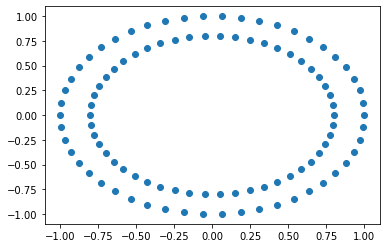

In [11]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])


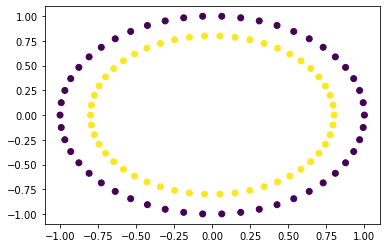

In [12]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0], inputData[1], c = outputData)


In [29]:
# Call the sklearn Kmeans and make a model with 200 samples


from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(inputData)
#model_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# check for labels
model.labels_


array([3, 3, 4, 2, 4, 1, 1, 1, 3, 1, 1, 1, 0, 2, 4, 1, 3, 4, 2, 4, 3, 3,
       2, 1, 2, 1, 3, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 4, 3, 1, 1, 1, 0,
       4, 3, 2, 4, 0, 1, 1, 1, 0, 4, 4, 3, 4, 3, 4, 4, 2, 2, 2, 3, 0, 2,
       4, 4, 4, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 4, 0, 2, 0, 2, 1,
       3, 3, 1, 2, 3, 1, 3, 0, 4, 4, 2, 4], dtype=int32)

In [18]:
from sklearn import metrics

In [19]:
# call metrics and check silhoutte score
metrics.silhouette_score(inputData, model.labels_)


0.445446171040731

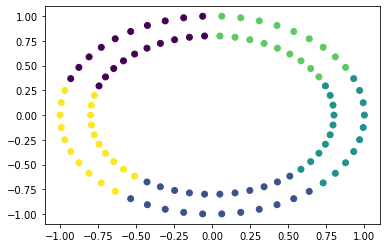

In [20]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0], inputData[1], c = model.labels_)


#### finding right number of cluster

In [21]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

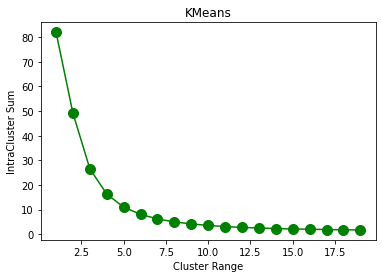

In [22]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()